In [1]:
!pip install xlrd

In [2]:
!pip install scikit_posthocs

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import kstest
from scipy.stats import spearmanr
import numpy as np
from scipy.stats import ttest_ind
from scipy.stats import kstest, levene
from scipy.stats import kruskal
import scikit_posthocs as sp
from scipy.stats import mannwhitneyu
from scipy.stats import ttest_rel
from scipy.stats import wilcoxon
import scipy.stats as stats
import random
import copy
from collections import defaultdict
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Part 1 of EDA

In [4]:
excel_file_path = 'DataForTable2.1.xls'

df = pd.read_excel(excel_file_path)

print(df)

     Country name  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
1     Afghanistan  2009     4.401778            7.508646        0.552308   
2     Afghanistan  2010     4.758381            7.613900        0.539075   
3     Afghanistan  2011     3.831719            7.581259        0.521104   
4     Afghanistan  2012     3.782938            7.660506        0.520637   
...           ...   ...          ...                 ...             ...   
2358     Zimbabwe  2019     2.693523            7.697755        0.759162   
2359     Zimbabwe  2020     3.159802            7.596050        0.717243   
2360     Zimbabwe  2021     3.154578            7.656878        0.685151   
2361     Zimbabwe  2022     3.296220            7.670073        0.666172   
2362     Zimbabwe  2023     3.572386            7.678590        0.693817   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

In [5]:
#a.	Which country has the highest score? Why? 
grouped = df.groupby('year')
max_indices = grouped['Life Ladder'].idxmax()
max_life_ladder_countries = df.loc[max_indices]

print("Country with highest Life Ladder score for each year:")
print(max_life_ladder_countries[['year', 'Country name', 'Life Ladder']])


Country with highest Life Ladder score for each year:
      year Country name  Life Ladder
539   2005      Denmark     8.018934
665   2006      Finland     7.672449
540   2007      Denmark     7.834233
541   2008      Denmark     7.970892
542   2009      Denmark     7.683359
543   2010      Denmark     7.770515
544   2011      Denmark     7.788232
2007  2012  Switzerland     7.776209
356   2013       Canada     7.593794
547   2014      Denmark     7.507559
1586  2015       Norway     7.603434
673   2016      Finland     7.659843
674   2017      Finland     7.788252
675   2018      Finland     7.858107
676   2019      Finland     7.780348
677   2020      Finland     7.889350
678   2021      Finland     7.794378
679   2022      Finland     7.728998
680   2023      Finland     7.698929


In [6]:
#b.	Are there any null values? How does this dataset need to be cleaned? 
#There are null values as shown below.
#On going through the data manually, we can see examples like China which have no values for perception of corruption for any year.
#Therefore a good strategy to clean this dataset would be to impute values with the mean of the column.
null_values = df.isnull().sum()
print("Null values in the DataFrame:")
print(null_values)

Null values in the DataFrame:
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


In [7]:
# Impute missing values with the mean of specific columns
columns_to_impute = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
                     'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
                     'Positive affect', 'Negative affect']

imputed_df = df.fillna(df[columns_to_impute].mean())

# Check if null values are imputed
print("Null values after imputation:")
print(imputed_df.isnull().sum())


Null values after imputation:
Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


In [8]:
#c.	Is there any correlation between the features? 
numerical_df = imputed_df.select_dtypes(include='number')

correlation_matrix = numerical_df.corr()

# Print correlation matrix
# print("Correlation matrix:")
# print(correlation_matrix)


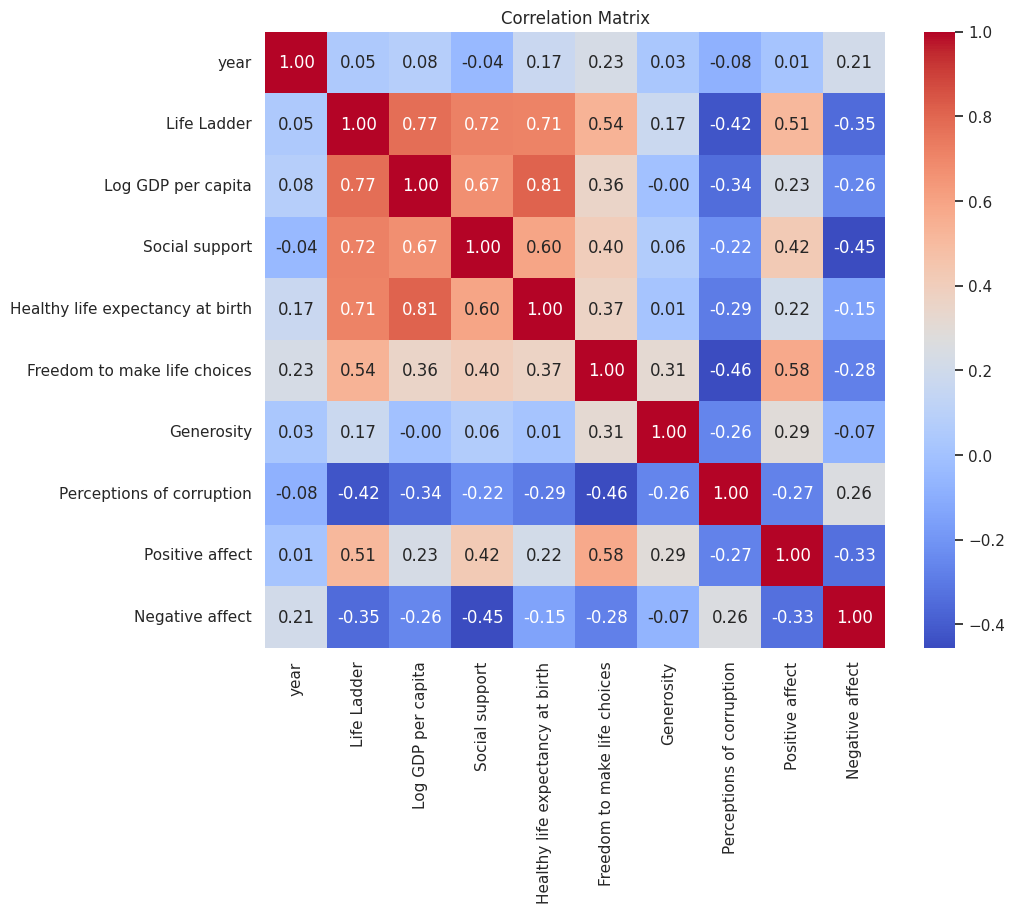

In [88]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [17]:
# Yes. Correlations do exist in the data.
correlation_coefficient, p_value = spearmanr(numerical_df['Healthy life expectancy at birth'], numerical_df['Log GDP per capita'])

# Significance level (alpha)
alpha = 0.05

print("Correlation coefficient:", correlation_coefficient)
print("P-value:", p_value)

# Interpretation
if p_value <= alpha:
    print("There is a statistically significant correlation.")
else:
    print("There is no statistically significant correlation.")


Correlation coefficient: 0.8348252718869742
P-value: 0.0
There is a statistically significant correlation.


Summary Statistics:
Minimum Life Ladder score: 1.2812711000442505
Maximum Life Ladder score: 8.01893424987793
Mean Life Ladder score: 5.48356241757114
Median Life Ladder score: 5.448724746704102
Standard deviation of Life Ladder scores: 1.1255229380428524


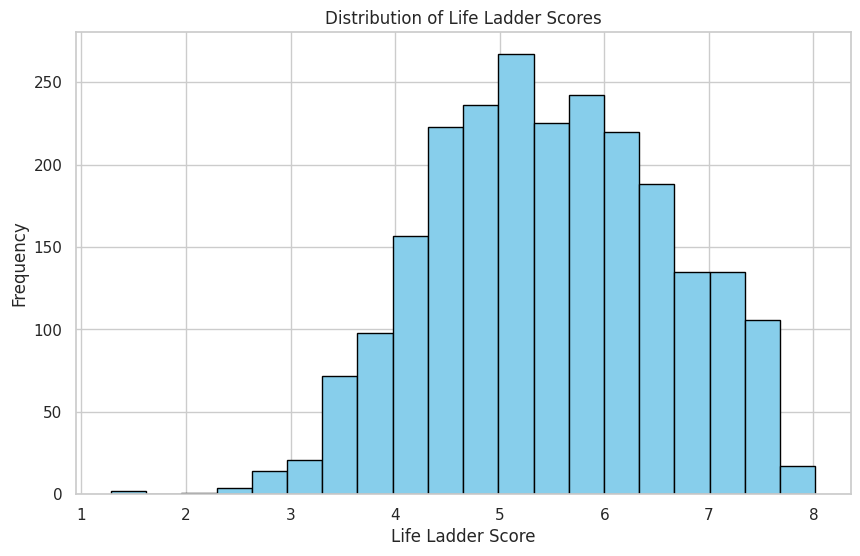

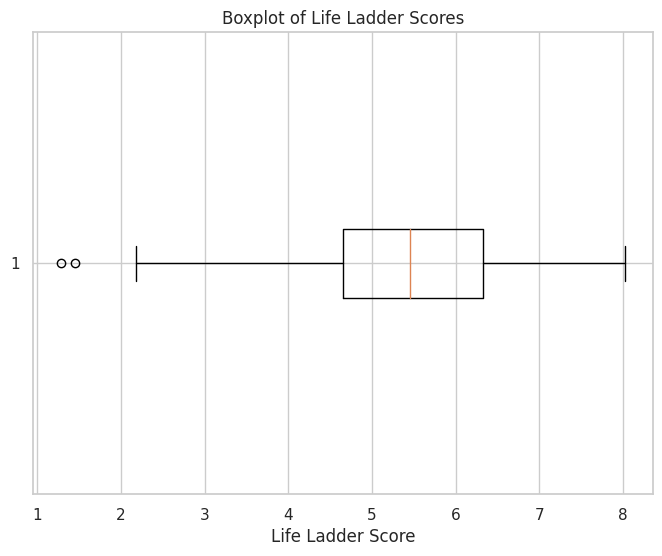

In [90]:
#d.	Are the minimum and maximum happiness scores reasonable? Are there any outliers? 

# Calculate summary statistics
min_score = numerical_df['Life Ladder'].min()
max_score = numerical_df['Life Ladder'].max()
mean_score = numerical_df['Life Ladder'].mean()
median_score = numerical_df['Life Ladder'].median()
std_score = numerical_df['Life Ladder'].std()

# Print summary statistics
print("Summary Statistics:")
print("Minimum Life Ladder score:", min_score)
print("Maximum Life Ladder score:", max_score)
print("Mean Life Ladder score:", mean_score)
print("Median Life Ladder score:", median_score)
print("Standard deviation of Life Ladder scores:", std_score)

# Visualize the distribution
plt.figure(figsize=(10, 6))
plt.hist(numerical_df['Life Ladder'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Life Ladder Scores')
plt.xlabel('Life Ladder Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Create a box plot to identify outliers
plt.figure(figsize=(8, 6))
plt.boxplot(numerical_df['Life Ladder'], vert=False)
plt.title('Boxplot of Life Ladder Scores')
plt.xlabel('Life Ladder Score')
plt.grid(True)
plt.show()


In [91]:
# Yes. There are a few outliers.
def find_outliers_std(df, column, threshold=2):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - threshold * std
    upper_bound = mean + threshold * std
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Find outliers in 'Life Ladder' column
outliers = find_outliers_std(numerical_df, 'Life Ladder', threshold=2)

# Print outliers
print("Outliers:")
print(len(outliers))
print(outliers)


Outliers:
47
      year  Life Ladder  Log GDP per capita  Social support  \
6     2014     3.130896            7.670638        0.525568   
9     2017     2.661718            7.647830        0.490880   
10    2018     2.694303            7.630801        0.507516   
11    2019     2.375092            7.640086        0.419973   
12    2021     2.436034            7.324501        0.454175   
13    2022     1.281271            9.399673        0.228217   
14    2023     1.445909            9.399673        0.368478   
196   2012     3.193469            7.894076        0.523027   
311   2014     2.904535            6.722985        0.564678   
370   2016     2.693061            6.707346        0.290184   
471   2022     3.207197            7.032319        0.654081   
539   2005     8.018934           10.849012        0.972372   
540   2007     7.834233           10.888726        0.954201   
541   2008     7.970892           10.877718        0.953912   
543   2010     7.770515           10.83615

In [92]:
#e.	What is the mean happiness score? 
#The mean happiness score as calculated above
print("Mean Life Ladder score:", mean_score)

Mean Life Ladder score: 5.48356241757114


Part 3 of EDA

In [93]:
# Perform Kolmogorov-Smirnov test for normality on each column
def test_normality_columns(df, alpha=0.05):
    # Iterate over each numerical column in the DataFrame
    for column in df.select_dtypes(include='number'):
        # Extract data from the column
        data = df[column].dropna().values
        
        # Perform Kolmogorov-Smirnov test
        statistic, p_value = kstest(data, 'norm')
        
        # Print test results
        # print(f"Kolmogorov-Smirnov test results for column '{column}':")
        # print("Test statistic:", statistic)
        # print("P-value:", p_value)
        
        # Interpret test results
        if p_value > alpha:
            print(f"The data in column '{column}' follows a normal distribution (fail to reject H0)")
        else:
            print(f"The data in column '{column}' does not follow a normal distribution (reject H0)")

# Perform Kolmogorov-Smirnov test on each column individually
test_normality_columns(numerical_df)


The data in column 'year' does not follow a normal distribution (reject H0)
The data in column 'Life Ladder' does not follow a normal distribution (reject H0)
The data in column 'Log GDP per capita' does not follow a normal distribution (reject H0)
The data in column 'Social support' does not follow a normal distribution (reject H0)
The data in column 'Healthy life expectancy at birth' does not follow a normal distribution (reject H0)
The data in column 'Freedom to make life choices' does not follow a normal distribution (reject H0)
The data in column 'Generosity' does not follow a normal distribution (reject H0)
The data in column 'Perceptions of corruption' does not follow a normal distribution (reject H0)
The data in column 'Positive affect' does not follow a normal distribution (reject H0)
The data in column 'Negative affect' does not follow a normal distribution (reject H0)


In [94]:
# Define a function to perform K-S test by year for all numerical columns
def kstest_by_year_all_columns(df, alpha=0.05):
    # Group the DataFrame by year
    grouped = df.groupby('year')
    
    # Get list of numerical columns
    numerical_columns = df.select_dtypes(include=['float', 'int']).columns.tolist()
    
    # Perform K-S test for each numerical column in each group
    for year, group_data in grouped:
        # print(f"Year {year}:")
        for column in numerical_columns:
            data = group_data[column].dropna().values
            statistic, p_value = kstest(data, 'norm')
            
            # Print test results
            # print(f"K-S test results for column '{column}':")
            # print("Test statistic:", statistic)
            # print("P-value:", p_value)
            
            # Interpret test results
            if p_value > alpha:
                print(f"The data for column '{column}' for year {year} follows a normal distribution (fail to reject H0)")
            # else:
            #     print(f"The data for column '{column}' for year {year} does not follow a normal distribution (reject H0)")
        # print()  # Add an empty line between years

# Perform K-S test by year for all numerical columns
kstest_by_year_all_columns(numerical_df)


The data is not normally distributed. Found using kstest as greater than 50 samples.

Outlier below lower whisker in Life Ladder: Afghanistan - 2022
Outlier below lower whisker in Life Ladder: Afghanistan - 2023


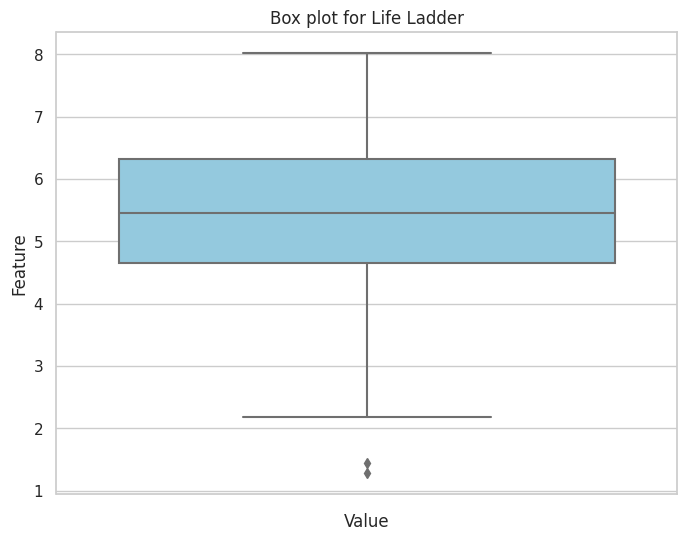

Outlier below lower whisker in Log GDP per capita: Venezuela - 2019


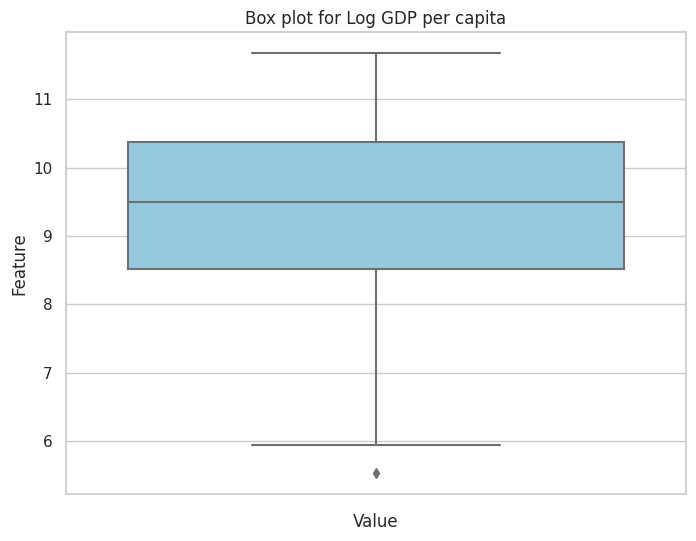

Outlier below lower whisker in Social support: Afghanistan - 2008
Outlier below lower whisker in Social support: Afghanistan - 2013
Outlier below lower whisker in Social support: Afghanistan - 2017
Outlier below lower whisker in Social support: Afghanistan - 2019
Outlier below lower whisker in Social support: Afghanistan - 2021
Outlier below lower whisker in Social support: Afghanistan - 2022
Outlier below lower whisker in Social support: Afghanistan - 2023
Outlier below lower whisker in Social support: Bangladesh - 2008
Outlier below lower whisker in Social support: Bangladesh - 2021
Outlier below lower whisker in Social support: Bangladesh - 2022
Outlier below lower whisker in Social support: Bangladesh - 2023
Outlier below lower whisker in Social support: Benin - 2006
Outlier below lower whisker in Social support: Benin - 2008
Outlier below lower whisker in Social support: Benin - 2011
Outlier below lower whisker in Social support: Benin - 2015
Outlier below lower whisker in Social 

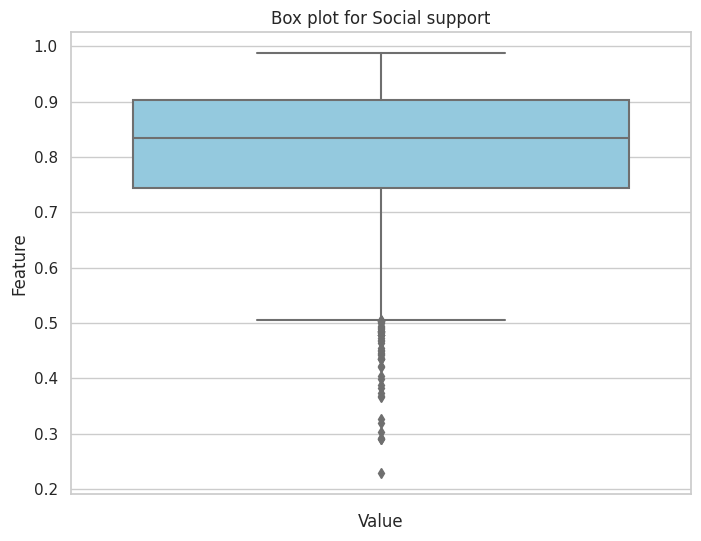

Outlier below lower whisker in Healthy life expectancy at birth: Central African Republic - 2007
Outlier below lower whisker in Healthy life expectancy at birth: Central African Republic - 2010
Outlier below lower whisker in Healthy life expectancy at birth: Central African Republic - 2011
Outlier below lower whisker in Healthy life expectancy at birth: Central African Republic - 2016
Outlier below lower whisker in Healthy life expectancy at birth: Central African Republic - 2017
Outlier below lower whisker in Healthy life expectancy at birth: Eswatini - 2011
Outlier below lower whisker in Healthy life expectancy at birth: Haiti - 2006
Outlier below lower whisker in Healthy life expectancy at birth: Haiti - 2008
Outlier below lower whisker in Healthy life expectancy at birth: Haiti - 2010
Outlier below lower whisker in Healthy life expectancy at birth: Haiti - 2011
Outlier below lower whisker in Healthy life expectancy at birth: Haiti - 2012
Outlier below lower whisker in Healthy life 

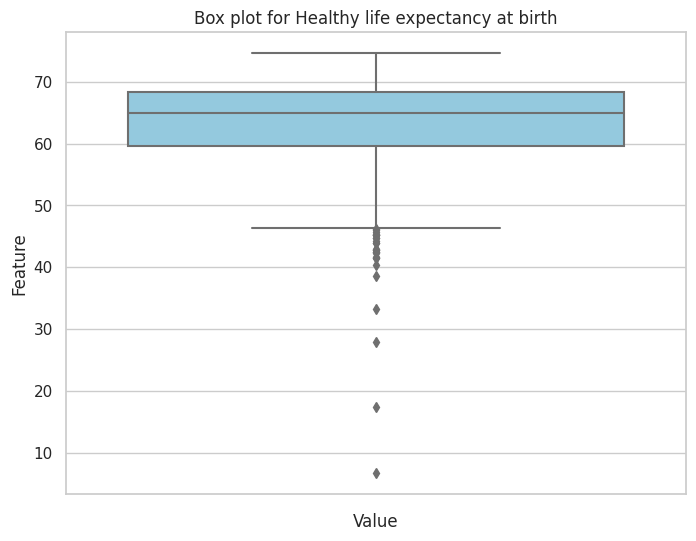

Outlier below lower whisker in Freedom to make life choices: Afghanistan - 2023
Outlier below lower whisker in Freedom to make life choices: Bosnia and Herzegovina - 2007
Outlier below lower whisker in Freedom to make life choices: Bosnia and Herzegovina - 2009
Outlier below lower whisker in Freedom to make life choices: Bosnia and Herzegovina - 2011
Outlier below lower whisker in Freedom to make life choices: Burundi - 2008
Outlier below lower whisker in Freedom to make life choices: Chad - 2006
Outlier below lower whisker in Freedom to make life choices: Chad - 2007
Outlier below lower whisker in Freedom to make life choices: Cuba - 2006
Outlier below lower whisker in Freedom to make life choices: Haiti - 2016
Outlier below lower whisker in Freedom to make life choices: Iraq - 2011
Outlier below lower whisker in Freedom to make life choices: Iraq - 2012
Outlier below lower whisker in Freedom to make life choices: Madagascar - 2008
Outlier below lower whisker in Freedom to make life c

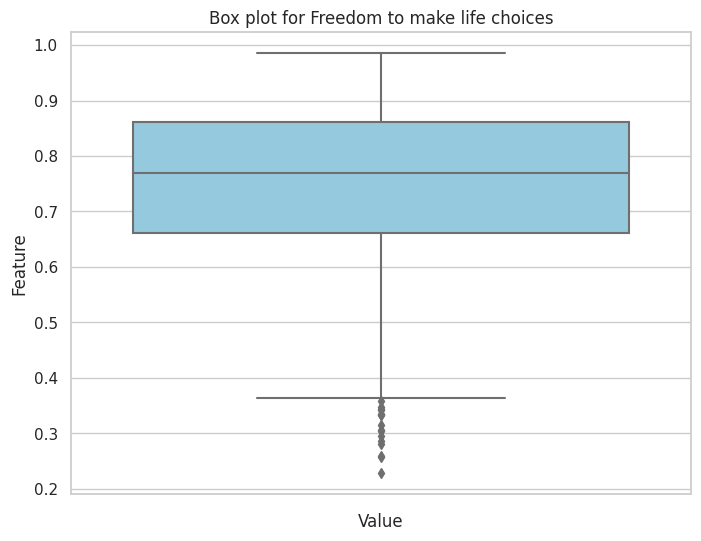

Outlier above upper whisker in Generosity: Cambodia - 2011
Outlier above upper whisker in Generosity: Gambia - 2018
Outlier above upper whisker in Generosity: Gambia - 2019
Outlier above upper whisker in Generosity: Gambia - 2023
Outlier above upper whisker in Generosity: Indonesia - 2010
Outlier above upper whisker in Generosity: Indonesia - 2011
Outlier above upper whisker in Generosity: Indonesia - 2014
Outlier above upper whisker in Generosity: Indonesia - 2015
Outlier above upper whisker in Generosity: Indonesia - 2016
Outlier above upper whisker in Generosity: Indonesia - 2017
Outlier above upper whisker in Generosity: Indonesia - 2018
Outlier above upper whisker in Generosity: Indonesia - 2019
Outlier above upper whisker in Generosity: Indonesia - 2020
Outlier above upper whisker in Generosity: Indonesia - 2021
Outlier above upper whisker in Generosity: Indonesia - 2022
Outlier above upper whisker in Generosity: Indonesia - 2023
Outlier above upper whisker in Generosity: Laos - 

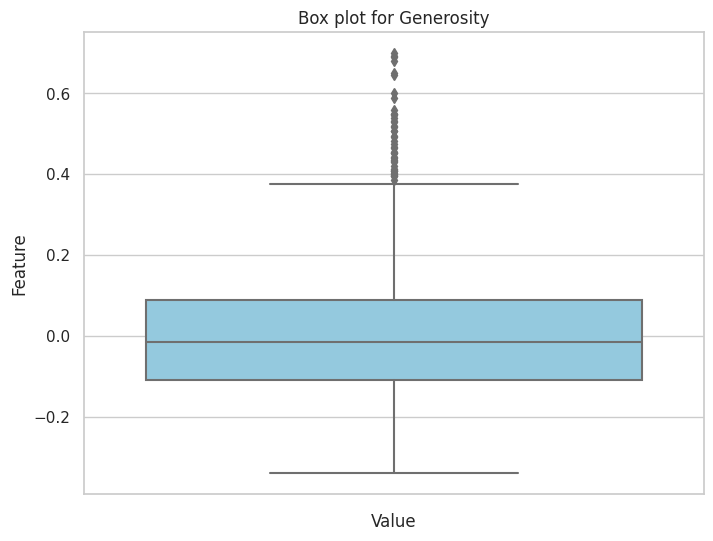

Outlier below lower whisker in Perceptions of corruption: Australia - 2005
Outlier below lower whisker in Perceptions of corruption: Australia - 2008
Outlier below lower whisker in Perceptions of corruption: Australia - 2010
Outlier below lower whisker in Perceptions of corruption: Australia - 2011
Outlier below lower whisker in Perceptions of corruption: Australia - 2012
Outlier below lower whisker in Perceptions of corruption: Australia - 2013
Outlier below lower whisker in Perceptions of corruption: Australia - 2014
Outlier below lower whisker in Perceptions of corruption: Australia - 2015
Outlier below lower whisker in Perceptions of corruption: Australia - 2016
Outlier below lower whisker in Perceptions of corruption: Australia - 2017
Outlier below lower whisker in Perceptions of corruption: Australia - 2018
Outlier below lower whisker in Perceptions of corruption: Australia - 2019
Outlier below lower whisker in Perceptions of corruption: Bahrain - 2012
Outlier below lower whisker

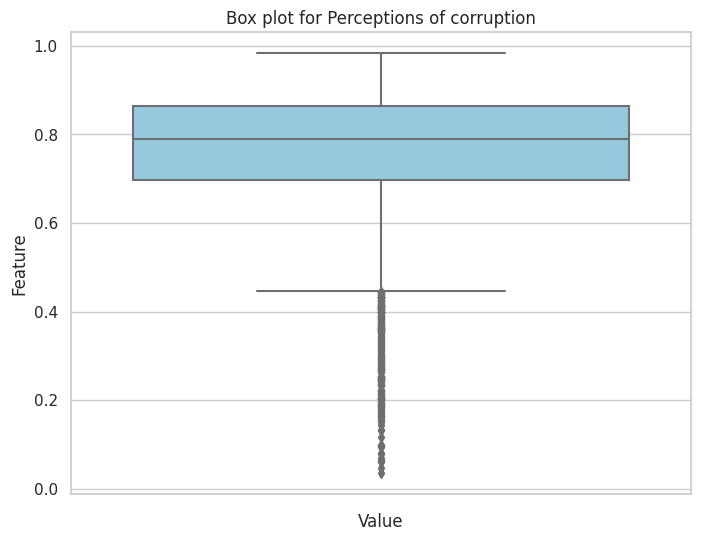

Outlier below lower whisker in Positive affect: Afghanistan - 2019
Outlier below lower whisker in Positive affect: Afghanistan - 2021
Outlier below lower whisker in Positive affect: Afghanistan - 2022
Outlier below lower whisker in Positive affect: Afghanistan - 2023
Outlier below lower whisker in Positive affect: Lebanon - 2019
Outlier below lower whisker in Positive affect: Lebanon - 2021
Outlier below lower whisker in Positive affect: Lebanon - 2022
Outlier below lower whisker in Positive affect: Türkiye - 2021
Outlier below lower whisker in Positive affect: Türkiye - 2022


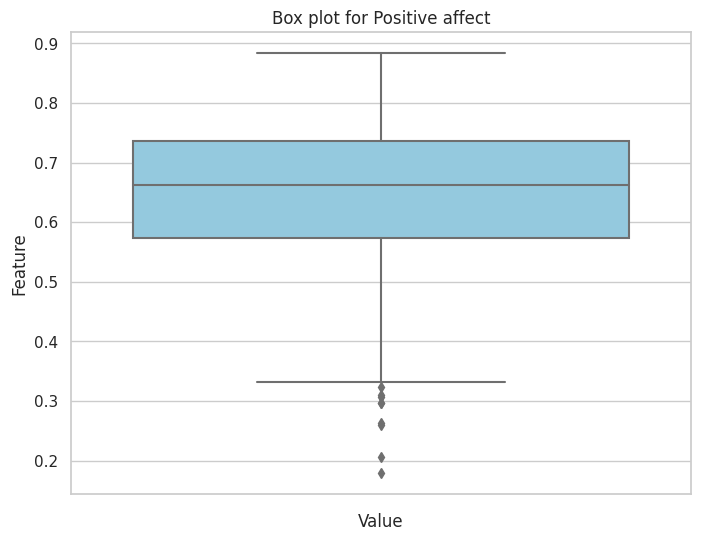

Outlier above upper whisker in Negative affect: Afghanistan - 2019
Outlier above upper whisker in Negative affect: Afghanistan - 2021
Outlier above upper whisker in Negative affect: Afghanistan - 2022
Outlier above upper whisker in Negative affect: Armenia - 2022
Outlier above upper whisker in Negative affect: Bahrain - 2011
Outlier above upper whisker in Negative affect: Central African Republic - 2017
Outlier above upper whisker in Negative affect: Chad - 2017
Outlier above upper whisker in Negative affect: Chad - 2018
Outlier above upper whisker in Negative affect: Guinea - 2023
Outlier above upper whisker in Negative affect: Iran - 2012
Outlier above upper whisker in Negative affect: Iran - 2013
Outlier above upper whisker in Negative affect: Iran - 2014
Outlier above upper whisker in Negative affect: Iran - 2015
Outlier above upper whisker in Negative affect: Iran - 2016
Outlier above upper whisker in Negative affect: Iraq - 2011
Outlier above upper whisker in Negative affect: Ira

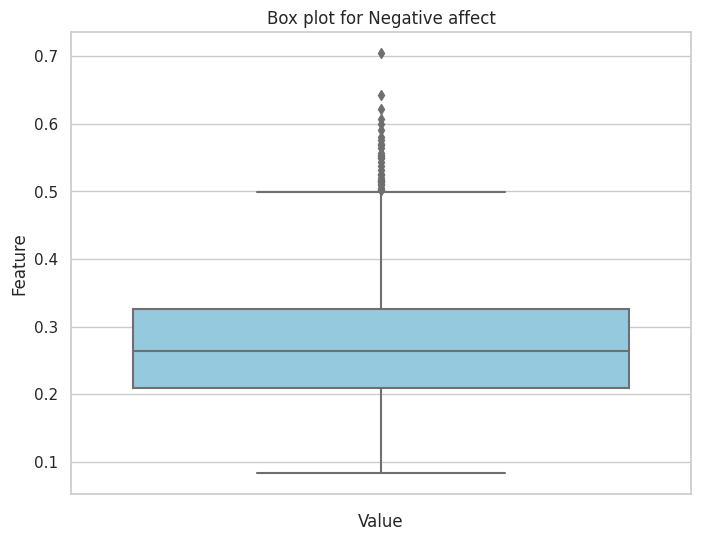

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Print box plot along with outliers
def print_boxplot_with_outliers(df):
    # Set the style of the plots
    sns.set(style="whitegrid")
    
    # Create a box plot for each numerical column
    for column in df.select_dtypes(include=['float', 'int']):
        if(column == 'year'):
            continue
        plt.figure(figsize=(8, 6))
        
        # Create the box plot
        sns.boxplot(y=df[column], color='skyblue')
        
        # Print outliers above upper whisker
        upper_whisker = df[column].quantile(0.75) + 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
        outliers_above = df[df[column] > upper_whisker]
        for index, row in outliers_above.iterrows():
            print(f"Outlier above upper whisker in {column}: {row['Country name']} - {row['year']}")
        
        # Print outliers below lower whisker
        lower_whisker = df[column].quantile(0.25) - 1.5 * (df[column].quantile(0.75) - df[column].quantile(0.25))
        outliers_below = df[df[column] < lower_whisker]
        for index, row in outliers_below.iterrows():
            print(f"Outlier below lower whisker in {column}: {row['Country name']} - {row['year']}")
        
        plt.title(f'Box plot for {column}')
        plt.ylabel('Feature')
        plt.xlabel('Value')
        plt.show()

# Example usage:
# Replace 'df' with your DataFrame containing the original data
print_boxplot_with_outliers(imputed_df)

In [18]:
items = numerical_df[['Life Ladder', 'Log GDP per capita', 'Social support', 'year', 'Freedom to make life choices', 'Healthy life expectancy at birth']]
corr_matrix, _ = spearmanr(items, axis=0)
mean_corr = (corr_matrix[np.tril_indices_from(corr_matrix, k=-1)]).mean()
num_items = len(items.columns)
cronbach_alpha = (mean_corr * num_items) / (1 + ((num_items - 1) * mean_corr))
print("Cronbach's Alpha:", cronbach_alpha)
# Interpret Cronbach's alpha value
if cronbach_alpha >= 0.9:
    print("Cronbach's alpha indicates excellent internal consistency.")
elif 0.8 <= cronbach_alpha < 0.9:
    print("Cronbach's alpha indicates good internal consistency.")
elif 0.7 <= cronbach_alpha < 0.8:
    print("Cronbach's alpha indicates acceptable internal consistency.")
elif 0.6 <= cronbach_alpha < 0.7:
    print("Cronbach's alpha indicates questionable internal consistency.")
else:
    print("Cronbach's alpha indicates poor internal consistency.")


Cronbach's Alpha: 0.8318992237551206
Cronbach's alpha indicates good internal consistency.


In [18]:
# Assuming your data is stored in a DataFrame called 'df'
# Filter data for United States
us_data = df[df['Country name'] == 'United States']

# Split data into two groups based on presidency (Obama and Biden)
obama_data = us_data[(us_data['year'] >= 2009) & (us_data['year'] <= 2017)]
biden_data = us_data[us_data['year'] >= 2021]

min_length = min(len(obama_data), len(biden_data))

# Randomly select a subset of observations from the longer sample
random_indices = random.sample(range(len(obama_data)), min_length)
print(random_indices)
obama_data = [obama_data.iloc[i]["Life Ladder"] for i in random_indices]

random_indices = random.sample(range(len(biden_data)), min_length)
biden_data = [biden_data.iloc[i]["Life Ladder"] for i in random_indices]

# Calculate average happiness scores for each presidency
average_happiness_obama = sum(obama_data)/len(obama_data)
average_happiness_biden = sum(biden_data) / len(biden_data)

# Perform t-test
t_statistic, p_value = wilcoxon(obama_data, biden_data)

print(p_value)

# Check if the p-value is less than 0.05 (common significance level)
if p_value < 0.05:
    print("There is a significant difference in average happiness scores between Obama's and Biden's presidencies.")
else:
    print("There is no significant difference in average happiness scores between Obama's and Biden's presidencies.")

# Optionally, print the average happiness scores for comparison
print("Average happiness score during Obama's presidency:", average_happiness_obama)
print("Average happiness score during Biden's presidency:", average_happiness_biden)


[1, 3, 4]
0.25
There is no significant difference in average happiness scores between Obama's and Biden's presidencies.
Average happiness score during Obama's presidency: 7.146376132965088
Average happiness score during Biden's presidency: 6.7242499987284345


In [67]:
df2 = pd.read_csv('HappinessAlcoholConsumption.csv')

In [68]:
items = df2
corr_matrix, _ = spearmanr(items, axis=0)
mean_corr = (corr_matrix[np.tril_indices_from(corr_matrix, k=-1)]).mean()
num_items = len(items.columns)
cronbach_alpha = (mean_corr * num_items) / (1 + ((num_items - 1) * mean_corr))
print("Cronbach's Alpha:", cronbach_alpha)
# Interpret Cronbach's alpha value
if cronbach_alpha >= 0.9:
    print("Cronbach's alpha indicates excellent internal consistency.")
elif 0.8 <= cronbach_alpha < 0.9:
    print("Cronbach's alpha indicates good internal consistency.")
elif 0.7 <= cronbach_alpha < 0.8:
    print("Cronbach's alpha indicates acceptable internal consistency.")
elif 0.6 <= cronbach_alpha < 0.7:
    print("Cronbach's alpha indicates questionable internal consistency.")
else:
    print("Cronbach's alpha indicates poor internal consistency.")


Cronbach's Alpha: 0.6186762009876985
Cronbach's alpha indicates questionable internal consistency.


In [60]:
df_before_2020 = imputed_df[(imputed_df['year'] >= 2000) & (imputed_df['year'] <= 2019)]
average_life_ladder = df_before_2020.groupby('Country name')['Life Ladder'].mean().reset_index()
merged_df = pd.merge(average_life_ladder, df2, left_on='Country name', right_on='Country', how='inner')

# Select the common countries
common_countries = merged_df['Country name']

# Calculate correlation between 'Life Ladder' and 'HappinessScore'
correlation, p_value = spearmanr(merged_df['Life Ladder'], merged_df['HappinessScore'])
# correlation = merged_df['Life Ladder'].corr(merged_df['HappinessScore'])

# Print correlation coefficient
print("Correlation coefficient between Life Ladder and HappinessScore:", correlation)

# Interpretation of correlation
if correlation > 0:
    print("There is a positive correlation between Life Ladder and HappinessScore.")
elif correlation < 0:
    print("There is a negative correlation between Life Ladder and HappinessScore.")
else:
    print("There is no correlation between Life Ladder and HappinessScore.")

# Perform a statistical test (e.g., t-test, Mann-Whitney U test) if needed
# t_statistic, t_p_value = wilcoxon(merged_df['Life Ladder'], merged_df['HappinessScore'])

# # Print the test result
# print("T-test statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation of the statistical test
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between Life Ladder and HappinessScore.")
else:
    print("There is no significant correlation between Life Ladder and HappinessScore.")


Correlation coefficient between Life Ladder and HappinessScore: 0.9795371647165843
There is a positive correlation between Life Ladder and HappinessScore.
P-value: 1.6168687603416895e-80
There is a significant correlation between Life Ladder and HappinessScore.


In [65]:
# imputed_df.head()
df_before_2020 = imputed_df[(imputed_df['year'] >= 2000) & (imputed_df['year'] <= 2019)]
average_life_ladder = df_before_2020.groupby('Country name')['Life Ladder'].mean().reset_index()
average_life_ladder.head()

,Country name,Life Ladder
0,Afghanistan,3.594628
1,Albania,4.990636
2,Algeria,5.389717
3,Angola,4.420299
4,Argentina,6.339423


In [67]:
df_before_2020 = imputed_df[(imputed_df['year'] >= 2000) & (imputed_df['year'] <= 2019)]
average_life_ladder = df_before_2020.groupby('Country name')['Perceptions of corruption'].mean().reset_index()
merged_df = pd.merge(average_life_ladder, df2, left_on='Country name', right_on='Country', how='inner')
merged_df['Alcohol_PerCapita'] = merged_df['Beer_PerCapita'] + merged_df['Spirit_PerCapita'] + merged_df['Wine_PerCapita']
# Select the common countries
common_countries = merged_df['Country name']
print(merged_df.head())

# Calculate correlation between 'Life Ladder' and 'HappinessScore'
correlation, p_value = spearmanr(merged_df['Perceptions of corruption'], merged_df['Alcohol_PerCapita'])
# correlation = merged_df['Life Ladder'].corr(merged_df['HappinessScore'])

# Print correlation coefficient
print("Correlation coefficient between Corruption and Alcohol consumption:", correlation)

# Interpretation of correlation
if correlation > 0:
    print("There is a positive correlation between Corruption and Alcohol consumption.")
elif correlation < 0:
    print("There is a negative correlation between Corruption and Alcohol consumption.")
else:
    print("There is no correlation between Corruption and Alcohol consumption.")

# Perform a statistical test (e.g., t-test, Mann-Whitney U test) if needed
# t_statistic, t_p_value = wilcoxon(merged_df['Life Ladder'], merged_df['HappinessScore'])

# # Print the test result
# print("T-test statistic:", t_statistic)
print("P-value:", p_value)

# Interpretation of the statistical test
alpha = 0.05
if p_value < alpha:
    print("There is a significant correlation between Corruption and Alcohol.")
else:
    print("There is no significant correlation between Corruption and Alcohol.")


  Country name  Perceptions of corruption    Country  \
0      Albania                   0.867527    Albania   
1       Angola                   0.867018     Angola   
2    Argentina                   0.843870  Argentina   
3      Armenia                   0.846484    Armenia   
4    Australia                   0.409601  Australia   

                        Region Hemisphere  HappinessScore  HDI  GDP_PerCapita  \
0   Central and Eastern Europe      north           4.655  782          4.132   
1           Sub-Saharan Africa      south           3.866  577          3.309   
2  Latin America and Caribbean      south           6.650  822         12.654   
3   Central and Eastern Europe      north           4.360  749          3.606   
4    Australia and New Zealand      south           7.313  938         49.897   

   Beer_PerCapita  Spirit_PerCapita  Wine_PerCapita  Alcohol_PerCapita  
0              89               132              54                275  
1             217             

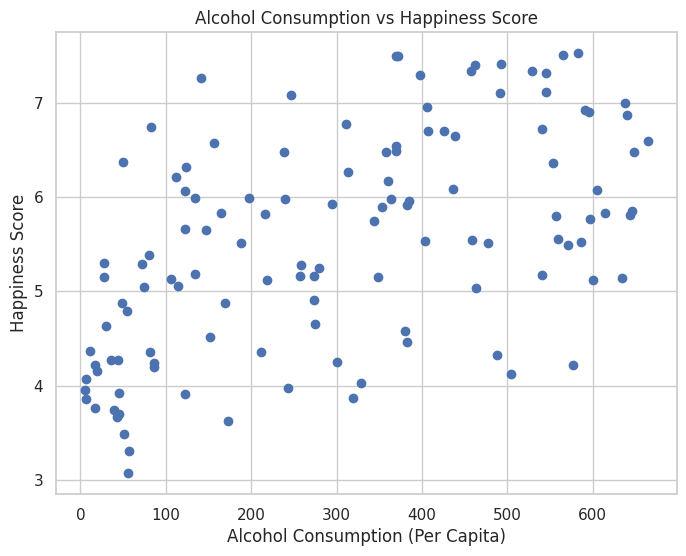

Correlation coefficient between alcohol consumption and happiness score: 0.5474609600344386
Countries with higher alcohol consumption tend to have higher happiness scores.


In [23]:
# Assuming your data is stored in a DataFrame called 'df'
# Calculate combined alcohol consumption per capita
df2['Alcohol_PerCapita'] = df2['Beer_PerCapita'] + df2['Spirit_PerCapita'] + df2['Wine_PerCapita']

# Calculate average happiness score and average alcohol consumption per country
country_stats = df2.groupby('Country').agg({
    'HappinessScore': 'mean',
    'Alcohol_PerCapita': 'mean'
}).reset_index()

# Calculate correlation coefficient between happiness score and alcohol consumption
correlation_coefficient = country_stats['HappinessScore'].corr(country_stats['Alcohol_PerCapita'])

# Plot the relationship between alcohol consumption and happiness score
plt.figure(figsize=(8, 6))
plt.scatter(country_stats['Alcohol_PerCapita'], country_stats['HappinessScore'])
plt.title('Alcohol Consumption vs Happiness Score')
plt.xlabel('Alcohol Consumption (Per Capita)')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

# Print correlation coefficient
print("Correlation coefficient between alcohol consumption and happiness score:", correlation_coefficient)

# Interpret the correlation coefficient
if correlation_coefficient > 0:
    print("Countries with higher alcohol consumption tend to have higher happiness scores.")
elif correlation_coefficient < 0:
    print("Countries with higher alcohol consumption tend to have lower happiness scores.")
else:
    print("There is no significant relationship between alcohol consumption and happiness score.")



In [24]:

# Divide countries into multiple groups based on alcohol consumption levels
# For demonstration purposes, let's divide them into quartiles
quartiles = country_stats['Alcohol_PerCapita'].quantile([0.25, 0.5, 0.75])
low_alcohol_countries = country_stats[country_stats['Alcohol_PerCapita'] <= quartiles[0.25]]['HappinessScore']
medium_alcohol_countries = country_stats[(country_stats['Alcohol_PerCapita'] > quartiles[0.25]) & (country_stats['Alcohol_PerCapita'] <= quartiles[0.75])]['HappinessScore']
high_alcohol_countries = country_stats[country_stats['Alcohol_PerCapita'] > quartiles[0.75]]['HappinessScore']

In [25]:
# Perform Kolmogorov-Smirnov test for normality
kstest_statistic, kstest_p_value = kstest(country_stats['HappinessScore'], 'norm')
print("Kolmogorov-Smirnov test for normality:")
print("Test statistic:", kstest_statistic)
print("P-value:", kstest_p_value)
if kstest_p_value < 0.05:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")

# Perform Levene's test for homogeneity of variances
levene_test_statistic, levene_p_value = levene(low_alcohol_countries, medium_alcohol_countries, high_alcohol_countries)
print("\nLevene's test for homogeneity of variances:")
print("Test statistic:", levene_test_statistic)
print("P-value:", levene_p_value)
if levene_p_value < 0.05:
    print("The variances are not homogeneous across groups.")
else:
    print("The variances appear to be homogeneous across groups.")


Kolmogorov-Smirnov test for normality:
Test statistic: 0.9989261170435373
P-value: 0.0
The data is not normally distributed.

Levene's test for homogeneity of variances:
Test statistic: 0.8159606481506126
P-value: 0.4446728704829599
The variances appear to be homogeneous across groups.


In [26]:
# Perform Kruskal-Wallis test
kruskal_statistic, kruskal_p_value = kruskal(low_alcohol_countries, medium_alcohol_countries, high_alcohol_countries)

# Print Kruskal-Wallis test statistic and p-value
print("Kruskal-Wallis test:")
print("Test statistic:", kruskal_statistic)
print("P-value:", kruskal_p_value)

# Interpret the results
alpha = 0.05  # significance level
if kruskal_p_value < alpha:
    print("There is a statistically significant difference in happiness scores among countries with different levels of alcohol consumption.")
else:
    print("There is no statistically significant difference in happiness scores among countries with different levels of alcohol consumption.")


Kruskal-Wallis test:
Test statistic: 34.44607253907278
P-value: 3.312305505990891e-08
There is a statistically significant difference in happiness scores among countries with different levels of alcohol consumption.


In [27]:
# Perform Dunn's post-hoc test with Bonferroni correction
dunn_results = sp.posthoc_dunn([low_alcohol_countries, medium_alcohol_countries, high_alcohol_countries], p_adjust='bonferroni')

# Print pairwise comparison results
print("Pairwise comparison results:")
print(dunn_results)


Pairwise comparison results:
              1         2             3
1  1.000000e+00  0.000005  9.468680e-08
2  5.248694e-06  1.000000  3.472660e-01
3  9.468680e-08  0.347266  1.000000e+00


In [28]:
# Calculate median happiness scores for each group
median_happiness_scores = [np.median(group) for group in [low_alcohol_countries, medium_alcohol_countries, high_alcohol_countries]]

# Sort groups based on median happiness scores
sorted_groups = [group for _, group in sorted(zip(median_happiness_scores, ["Low", "Medium", "High"]), reverse=True)]

# Perform Dunn's post-hoc test with Bonferroni correction
dunn_results = sp.posthoc_dunn([low_alcohol_countries, medium_alcohol_countries, high_alcohol_countries], p_adjust='bonferroni')

# Define significance level
alpha = 0.05

# Interpret pairwise comparison results
print("Ordered Groups based on Median Happiness Scores:")
print(sorted_groups)
print("\nPairwise comparison results:")
for i, group1 in enumerate(sorted_groups):
    for j, group2 in enumerate(sorted_groups):
        if i < j:
            p_value = dunn_results.iloc[i, j]
            if p_value < alpha:
                print(f"{group1} vs {group2}: Statistically significant (p-value = {p_value:.4f})")
            else:
                print(f"{group1} vs {group2}: Not statistically significant (p-value = {p_value:.4f})")


Ordered Groups based on Median Happiness Scores:
['High', 'Medium', 'Low']

Pairwise comparison results:
High vs Medium: Statistically significant (p-value = 0.0000)
High vs Low: Statistically significant (p-value = 0.0000)
Medium vs Low: Not statistically significant (p-value = 0.3473)


Therefore higher alcohol consumption tends to give more happiness except from low to medium, i.e, a high alcohol consumption actually makes the difference.

In [29]:
# Perform Kolmogorov-Smirnov test for normality
kstest_statistic, kstest_p_value = kstest(numerical_df['Life Ladder'], 'norm')

# Print Kolmogorov-Smirnov test statistic and p-value
print("Kolmogorov-Smirnov test for normality:")
print("Test statistic:", kstest_statistic)
print("P-value:", kstest_p_value)

# Interpret the results
alpha = 0.05  # significance level
if kstest_p_value < alpha:
    print("The data is not normally distributed.")
else:
    print("The data appears to be normally distributed.")


Kolmogorov-Smirnov test for normality:
Test statistic: 0.9930491371085572
P-value: 0.0
The data is not normally distributed.


In [24]:
def calculate_median(numbers):
    sorted_numbers = sorted(numbers)
    n = len(sorted_numbers)
    
    if n % 2 == 1:
        # If the number of elements is odd, return the middle value
        return sorted_numbers[n // 2]
    else:
        # If the number of elements is even, return the average of the two middle values
        middle_index = n // 2
        return (sorted_numbers[middle_index - 1] + sorted_numbers[middle_index]) / 2

# Subset data into two groups: before pandemic (2017-2019) and during pandemic (2020-2021)
before_pandemic = df[df['year'].isin(range(2016, 2020))]['Life Ladder']
during_pandemic = df[df['year'].isin(range(2020, 2024))]['Life Ladder']

min_length = min(len(before_pandemic), len(during_pandemic))
# before_pandemic = before_pandemic[:min_length]
# during_pandemic = during_pandemic[:min_length]


# Randomly select a subset of observations from the longer sample
random_indices = random.sample(range(len(before_pandemic)), min_length)
# print(random_indices)
before_pandemic = [before_pandemic.iloc[i] for i in random_indices]

random_indices = random.sample(range(len(during_pandemic)), min_length)
during_pandemic = [during_pandemic.iloc[i] for i in random_indices]

# Perform Mann-Whitney U test
statistic, p_value = wilcoxon(before_pandemic, during_pandemic)

print("Test statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value < alpha:
    print("There is a significant difference in average life evaluation scores between before and during the COVID-19 pandemic.")
else:
    print("There is no significant difference in average life evaluation scores between before and during the COVID-19 pandemic.")
median_difference = calculate_median(before_pandemic) - calculate_median(during_pandemic)
if median_difference > 0:
    direction = "positive"
elif median_difference < 0:
    direction = "negative"
else:
    direction = "no"

# Print results
print("Wilcoxon signed-rank test results:")
print(f"Wilcoxon statistic: {statistic}")
print(f"P-value: {p_value}")
print(f"The median difference in 'Life Ladder' between during pandemic and before pandemic is {median_difference:.2f}, with a {direction} direction.")

Test statistic: 59203.0
P-value: 0.02707872544134864
There is a significant difference in average life evaluation scores between before and during the COVID-19 pandemic.
Wilcoxon signed-rank test results:
Wilcoxon statistic: 59203.0
P-value: 0.02707872544134864
The median difference in 'Life Ladder' between during pandemic and before pandemic is -0.34, with a negative direction.


In [ ]:
difference = before_pandemic - during_pandemic

# Perform Wilcoxon signed-rank test
_, p_value = wilcoxon(before_pandemic, during_pandemic)

# If the overall test is significant, perform Dunn's test
if p_value < 0.05:
    # Extract the differences for each group
    group1 = data.loc[data['Group'] == 'Group1', 'Difference']
    group2 = data.loc[data['Group'] == 'Group2', 'Difference']
    # Perform Dunn's test
    dunn_results = sp.posthoc_dunn([group1, group2], p_adjust='bonferroni')
    print("Dunn's test results:")
    print(dunn_results)
else:
    print("No significant difference between groups.")


In [31]:
# Perform Kruskal-Wallis test
kruskal_statistic, kruskal_p_value = kruskal(before_pandemic, during_pandemic)

# Print Kruskal-Wallis test statistic and p-value
print("Kruskal-Wallis test:")
print("Test statistic:", kruskal_statistic)
print("P-value:", kruskal_p_value)

# Interpret the results
alpha = 0.05  # significance level
if kruskal_p_value < alpha:
    print("There is a significant difference in median life evaluation scores between before and during the COVID-19 pandemic.")
else:
    print("There is no significant difference in median life evaluation scores between before and during the COVID-19 pandemic.")


Kruskal-Wallis test:
Test statistic: 4.435200821333638
P-value: 0.035205077847412135
There is a significant difference in median life evaluation scores between before and during the COVID-19 pandemic.


Hypothesis 1
We go ahead with the spearmanr correlation so as to model a correlation between the two variables, especially seeing the nature of variables and the non-normal distribution of these variables.

In [16]:
spearman_corr, spearman_pval = stats.spearmanr(numerical_df['Log GDP per capita'], numerical_df['Life Ladder'])

# Step 3: Print correlation coefficient and p-value
print("spearman correlation coefficient:", spearman_corr)
print("P-value:", spearman_pval)

# Step 4: Test for significance
alpha = 0.05

if spearman_pval < alpha:
    print("Reject the null hypothesis. There is a significant correlation between 'Life Ladder' and 'Log GDP per capita'.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between 'Life Ladder' and 'Log GDP per capita'.")

# Define the strength of correlation
if spearman_corr > 0.8:
    correlation_strength = "Very Strong"
elif spearman_corr > 0.6:
    correlation_strength = "Strong"
elif spearman_corr > 0.4:
    correlation_strength = "Moderate"
elif spearman_corr > 0.2:
    correlation_strength = "Weak"
else:
    correlation_strength = "Very Weak"

# Define the direction of correlation
if spearman_corr > 0:
    correlation_direction = "positive"
elif spearman_corr < 0:
    correlation_direction = "negative"
else:
    correlation_direction = "no"

# Print interpretation
print("The correlation between 'Life Ladder' and 'Log GDP per capita' is", correlation_strength, "and", correlation_direction)


spearman correlation coefficient: 0.7967735518623378
P-value: 0.0
Reject the null hypothesis. There is a significant correlation between 'Life Ladder' and 'Log GDP per capita'.
The correlation between 'Life Ladder' and 'Log GDP per capita' is Strong and positive


In [26]:
numerical_df2 = copy.deepcopy(numerical_df)

In [70]:
numerical_df.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [77]:
X = []
Y = []
j = len(imputed_df)
scaler = MinMaxScaler()
scaler2 = MinMaxScaler()
normalized_df = pd.DataFrame(scaler.fit_transform(numerical_df.drop(columns=['year'])), columns=numerical_df.drop(columns=['year']).columns)
for i in range(j):
    if(i + 1 >= j):
        break
    if(df.iloc[i + 1]['Country name'] == df.iloc[i]['Country name']):
        X.append([normalized_df.iloc[i]['Life Ladder'], normalized_df.iloc[i]['Log GDP per capita'], normalized_df.iloc[i]['Social support'], normalized_df.iloc[i]['Healthy life expectancy at birth'], normalized_df.iloc[i]['Freedom to make life choices'], normalized_df.iloc[i]['Generosity'], normalized_df.iloc[i]['Perceptions of corruption'], normalized_df.iloc[i]['Positive affect'], normalized_df.iloc[i]['Negative affect']])
        Y.append([imputed_df.iloc[i + 1]['Life Ladder']])

Y_scaled = scaler2.fit_transform(Y)
model = sm.Logit(Y_scaled, X).fit()

Optimization terminated successfully.
         Current function value: 0.547880
         Iterations 6


In [79]:
# Make predictions
prediction = model.predict(scaler.transform([[7.219,10.791,0.922,68.720,0.901,0.064,0.721,0.744,0.218]]))
print(prediction)
# Denormalize the predicted probabilities
descaled_data = scaler2.inverse_transform([prediction])
print(descaled_data)

[0.84405688]
[[6.92769163]]


/home/pranit/.local/lib/python3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
